# Stock Price Predictor using SVM
## How this works
A <b>Support Vector Machine (SVM)</b> works on a simple formula and draws a line between the two different sets data points to separate them and predict the next value in the dataset. It uses `Gradient Descent` and `Error Optimisation` to reduce the error and get better and better with its predictions. In this notebook we will use `pandas` to get the datasets and read them and `numpy` to organise the datsets and `sci-kit learn` to prepare our model and predict the closing stock prices of any given company by just locking at the date and opening price of the stocks and `matplotlib` to visualize the datasets. You can also watch this <a href="https://www.youtube.com/watch?v=fwY9Qv96DJY">tutorial</a> on the training and testing of SVMs but that tutorial shows a different approach when handeling the test and train data, so it depends on you to choose one dataset handeling technique

## Model as different steps
We can execute each step one by one while preparing the model.

#### 1. Installing the dependencies
We'll need `pandas` and `sklearn` for our predictions and `matplotlib` for data visualization.

In [29]:
import pandas as pd
import numpy as np
import sklearn.linear_model as linear_model
import matplotlib.pyplot as plt

#### 2. Getting the datasets
We'll need to get the historical data of the stocks we want to predict, so here we have the historical data of a company from <a href="http://finance.yahoo.com">Yahoo! Finance</a> and storing it as a csv file which our `pd.read_csv` function would access. Then we will get the opening and the closing prices from the train dataset to train our model on(if you want then you can also train your model on different dataset). Then we will get the opening price from our test dataset to test our model and get the predictions.

In [30]:
train_dataset = pd.read_csv("train.csv", sep=",")
test_dataset = pd.read_csv("test.csv", sep=",")

We'll need to divide the train and test dataset into `x_train`, `y_train` and `x_test`, `y_test` to train our model on.

In [31]:
x_train = np.array(train_dataset[["Open"]])
y_train = np.array(train_dataset[["Close"]])
x_test = np.array(test_dataset[["Open"]])
y_test = np.array(test_dataset[["Close"]])

#### 3. Training the model
We'll need to train our <b>model</b> now using the `x_train`, `y_train` dataset variables and see whether it can correctly predict the closing prices of the company stocks.

In [32]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train, 1000)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 4. Visualizing the dataset
Now we can visualize the dataset using `matplotlib`.

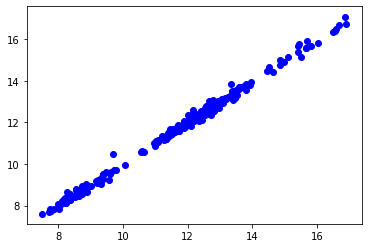

In [33]:
plt.scatter(x_train, y_train, color="Blue")
plt.show()

#### 5. Making prdictions
Now we can make predictions and predict the closing stock prices with just the opening price of the stocks. Then we will compare the predicted price with the real price.

In [34]:
predictions = linear.predict(x_test)
real = y_test
print("Prediction: ", predictions, " | Real: ", real)

Prediction:  [[290.75005121]]  | Real:  [[285.3]]


#### 6. Calculating Error
Now we can calculate the error by subtracting the Predicted value from the real value

In [35]:
error = predictions - real
print("Error: ", error)

Error:  [[5.45005121]]


## Model as a function
We can store our whole model as a function and use it in only on line of code.

In [10]:
def stockPredictor(train_dataset, test_dataset, epochs):
    # Getting the datsets
    train_dataset = pd.read_csv(train_dataset, sep=",")
    train_dataset = train_dataset[["Open", "Close"]]
    test_dataset = pd.read_csv(test_dataset, sep=",")
    test_dataset = test_dataset[["Open", "Close"]]
    predict = "Close"
    x_train = np.array(train_dataset.drop([predict], 1))
    y_train = np.array(train_dataset[predict])
    x_test = np.array(test_dataset.drop([predict], 1))
    y_test = np.array(test_dataset[predict])
    # Training the model
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train, epochs)
    # Visualize the datsets
    plt.scatter(x_train, y_train, color="Blue")
    plt.show()
    # Make predictions
    predictions = linear.predict(x_test)
    real = y_test
    print("Prediction: ", predictions, " | Real: ", real)
    # Calculate the error
    error = predictions - real
    print("Error: ", error)

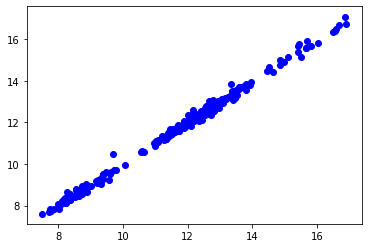

Prediction:  [290.75005121]  | Real:  [285.3]
Error:  [5.45005121]


In [12]:
# Initializing variables
train_dataset = "C:\\Users\\rishit\\PycharmProjects\\tensorEnv\\train.csv"
test_dataset = "C:\\Users\\rishit\\PycharmProjects\\tensorEnv\\test.csv"
# Calling the function
stockPredictor(train_dataset, test_dataset, epochs = 1000)